**Random Forest**

1. Cómo importar las librerías

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

2. Importar el Data Set

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Alex-Flores-Dev/pets-ML/main/train-ohc2.csv')
df

,Type,Name,Age,Breed1,Breed2,Gender 1,Gender 2,Gender 3,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated 1,Vaccinated 2,Vaccinated 3,Dewormed 1,Dewormed 2,Dewormed 3,Sterilized 1,Sterilized 2,Sterilized 3,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,0,0,1,7,0,1,1,0,1,0,0,1,0,0,1,0,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1,2
1,2,No Name Yet,1,265,0,1,0,0,1,2,0,2,2,0,0,1,0,0,1,0,0,1,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2,0
2,1,Brisco,1,307,0,1,0,0,2,7,0,2,2,1,0,0,1,0,0,0,1,0,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7,3
3,1,Miko,4,307,0,0,1,0,1,2,0,2,1,1,0,0,1,0,0,0,1,0,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8,2
4,1,Hunter,1,307,0,1,0,0,1,0,0,2,1,0,1,0,0,1,0,0,1,0,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14988,2,NaN,2,266,0,0,0,1,1,0,0,2,2,0,1,0,0,1,0,0,1,0,1,4,0,41326,61c84bd7bcb6fb31d2d480b1bcf9682e,0,I have 4 kittens that need to be adopt urgentl...,dc0935a84,3,2
14989,2,Serato & Eddie,60,265,264,0,0,1,1,4,7,2,2,1,0,0,1,0,0,1,0,0,1,2,0,41326,1d5096c4a5e159a3b750c5cfcf6ceabf,0,Serato(female cat- 3 color) is 4 years old and...,a01ab5b30,3,4
14990,2,Monkies,2,265,266,0,0,1,5,6,7,3,2,0,1,0,1,0,0,0,0,1,1,5,30,41326,6f40a7acfad5cc0bb3e44591ea446c05,0,"Mix breed, good temperament kittens. Love huma...",d981b6395,5,3
14991,2,Ms Daym,9,266,0,0,1,0,4,7,0,1,1,1,0,0,1,0,0,1,0,0,1,1,0,41336,c311c0c569245baa147d91fa4e351ae4,0,she is very shy..adventures and independent..s...,e4da1c9e4,3,4


In [ ]:
X = df.iloc[:, np.r_[5:7,13:21]].values
Y = df.iloc[:, 31].values

In [ ]:
X

array([[1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 0, 0],
       [1, 0, 1, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 0, 1]])

In [ ]:
Y

array([2, 0, 3, ..., 3, 4, 3])

3. Dividir el data set en conjunto de entrenamiento y conjunto de testing

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

4. Escalado de variables

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
X_train

array([[ 1.31320113, -0.97349243, -0.81428963, ..., -0.36673836,
        -0.51333493,  0.70569228],
       [-0.76149797,  1.02722935, -0.81428963, ..., -0.36673836,
        -0.51333493,  0.70569228],
       [ 1.31320113, -0.97349243,  1.22806428, ..., -0.36673836,
         1.94804587, -1.41704823],
       ...,
       [ 1.31320113, -0.97349243, -0.81428963, ..., -0.36673836,
        -0.51333493,  0.70569228],
       [-0.76149797, -0.97349243, -0.81428963, ..., -0.36673836,
        -0.51333493,  0.70569228],
       [-0.76149797,  1.02722935,  1.22806428, ..., -0.36673836,
         1.94804587, -1.41704823]])

In [ ]:
X_test

array([[-0.76149797, -0.97349243, -0.81428963, ..., -0.36673836,
        -0.51333493,  0.70569228],
       [ 1.31320113, -0.97349243,  1.22806428, ..., -0.36673836,
        -0.51333493,  0.70569228],
       [-0.76149797,  1.02722935, -0.81428963, ..., -0.36673836,
        -0.51333493,  0.70569228],
       ...,
       [-0.76149797,  1.02722935, -0.81428963, ..., -0.36673836,
        -0.51333493,  0.70569228],
       [ 1.31320113, -0.97349243, -0.81428963, ..., -0.36673836,
        -0.51333493,  0.70569228],
       [-0.76149797,  1.02722935,  1.22806428, ..., -0.36673836,
        -0.51333493, -1.41704823]])

5. Ajustar el clasificador en el Conjunto de Entrenamiento

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=100, criterion="entropy")
classifier.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

6. Predicción de los resultados con el Conjunto de Testing

In [ ]:
Y_pred  = classifier.predict(X_test)

In [ ]:
Y_pred

array([2, 2, 2, ..., 2, 2, 4])

7. Elaborar una matriz de confusión

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

In [ ]:
cm

array([[  0,   9,  58,   3,  24],
       [  0, 111, 492,  25, 162],
       [  0, 120, 607,  67, 232],
       [  0,  65, 455,  60, 228],
       [  0,  87, 456,  29, 459]])

8. Accuracy

In [ ]:
from sklearn import metrics
k_rango = range(1,100)
scores = {}
scores_list = []
for k in k_rango:
  scores[k] = metrics.accuracy_score(Y_test,Y_pred)
  scores_list.append(metrics.accuracy_score(Y_test,Y_pred))

In [ ]:
k_rango,scores_list

(range(1, 100),
 [0.3299546545745532,
  0.3299546545745532,
  0.3299546545745532,
  0.3299546545745532,
  0.3299546545745532,
  0.3299546545745532,
  0.3299546545745532,
  0.3299546545745532,
  0.3299546545745532,
  0.3299546545745532,
  0.3299546545745532,
  0.3299546545745532,
  0.3299546545745532,
  0.3299546545745532,
  0.3299546545745532,
  0.3299546545745532,
  0.3299546545745532,
  0.3299546545745532,
  0.3299546545745532,
  0.3299546545745532,
  0.3299546545745532,
  0.3299546545745532,
  0.3299546545745532,
  0.3299546545745532,
  0.3299546545745532,
  0.3299546545745532,
  0.3299546545745532,
  0.3299546545745532,
  0.3299546545745532,
  0.3299546545745532,
  0.3299546545745532,
  0.3299546545745532,
  0.3299546545745532,
  0.3299546545745532,
  0.3299546545745532,
  0.3299546545745532,
  0.3299546545745532,
  0.3299546545745532,
  0.3299546545745532,
  0.3299546545745532,
  0.3299546545745532,
  0.3299546545745532,
  0.3299546545745532,
  0.3299546545745532,
  0.329954654574

Text(0, 0.5, 'ValoR de Accuracy en Test')

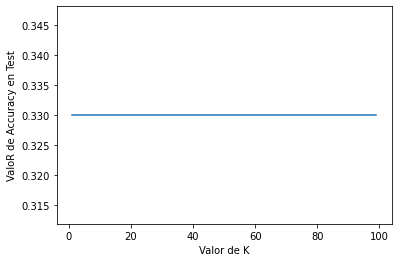

In [ ]:
plt.plot(k_rango,scores_list)
plt.xlabel('Valor de K')
plt.ylabel('ValoR de Accuracy en Test')